In [6]:
%run requirements.ipynb
%run config.ipynb
%run module_preprocess.ipynb
%run module_feature_extraction.ipynb
%run module_training.ipynb

In [ ]:
area0 = pd.read_csv("CSV/smartmeter/smart_meter_0.csv")
area1 = pd.read_csv("CSV/smartmeter/smart_meter_1.csv")

In [ ]:
area0.shape, area1.shape

In [ ]:
area0.head(2)

In [ ]:
data = pd.concat([area0, area1])

In [ ]:
data['MeterID'].value_counts()

In [18]:
e = data.to_csv(index=False)
f = open('CSV/smart_meter_sample_area0_area1.csv','w')
f.write(e) #Give your csv text here.
f.close()

In [3]:
origin_meter_data_group = read_smart_meter_csv(2,'CSV/smart_meter_sample_area0_area1.csv' )
smart_meter_data_group = read_smart_meter_csv(2,'CSV/smart_meter_sample_area0_area1.csv' )
# the value of x is divided by its
# maximum and scaled into a value between zero and one
# normalized smart_meter_data_group by divide the max eletricity of the meter
for area in smart_meter_data_group:
    for meter in area['fdi']:
        meter_numpy = meter['Electricity'].to_numpy()
        meter['Electricity'] = meter_numpy / meter_numpy.max()
    for meter in area['normal']:
        meter_numpy = meter['Electricity'].to_numpy()
        meter['Electricity'] = meter_numpy / meter_numpy.max()
smart_meter_data_group[0]['fdi'][0]['Electricity'].to_numpy()

start area  0
start area  1
start area  0
start area  1


array([0.03654133667327904, 0.03531269191667239, 0.030966420614507387,
       ..., 0.04361966398335228, 0.03120148357601003,
       0.011117897020210493], dtype=object)

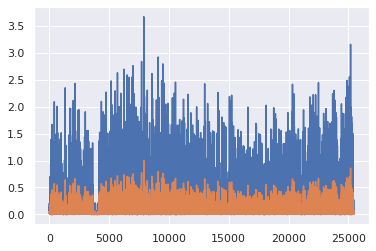

In [4]:
# make sure there is difference between the observe_meter_data_group and smart_meter_data_group
plt.plot(origin_meter_data_group[0]["fdi"][0]["Electricity"].tolist())
plt.plot(smart_meter_data_group[0]["fdi"][0]["Electricity"].tolist()) 

In [7]:
four_time_list = calc_four_time(smart_meter_data_group, NUMBER_OF_DAYS)

  0%|          | 0/2 [00:00<?, ?it/s]

1
2


In [41]:
four_time = pd.DataFrame(four_time_list)

In [42]:
def plot_four_time(user):
    print(four_time['FDI'].loc[user*530+1], four_time['FDI'].iloc[user*530:(user+1)*530].value_counts())
    plt.figure(figsize=(8,3))
    plt.plot(four_time['overnight'][user*530:(user+1)*530])
    plt.plot(four_time['breakfast'][user*530:(user+1)*530])
    plt.plot(four_time['daytime'][user*530:(user+1)*530])
    plt.plot(four_time['evening'][user*530:(user+1)*530])
    plt.show()

True True    530
Name: FDI, dtype: int64


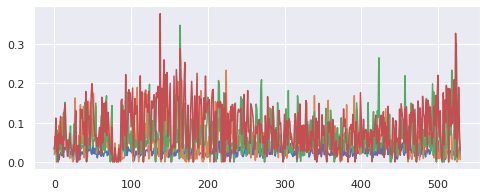

True True    530
Name: FDI, dtype: int64


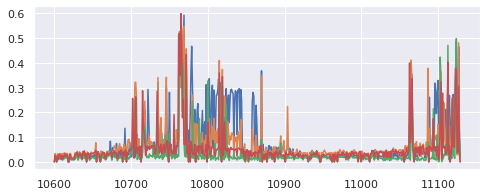

True True    530
Name: FDI, dtype: int64


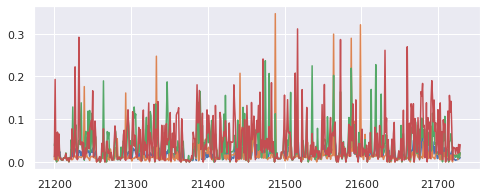

False False    530
Name: FDI, dtype: int64


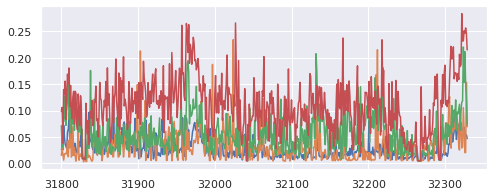

False False    530
Name: FDI, dtype: int64


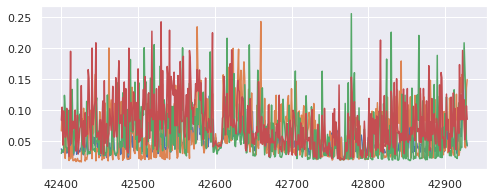

False False    530
Name: FDI, dtype: int64


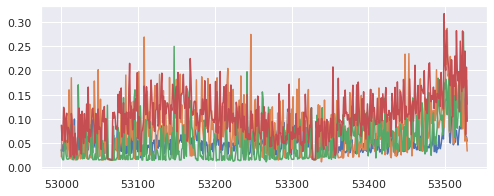

False False    530
Name: FDI, dtype: int64


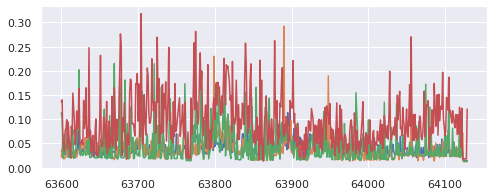

False False    530
Name: FDI, dtype: int64


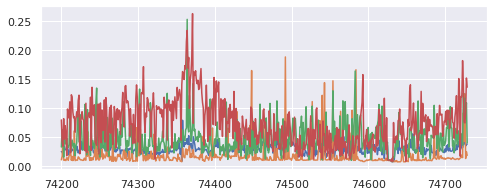

False False    530
Name: FDI, dtype: int64


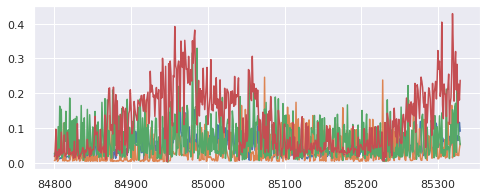

False False    530
Name: FDI, dtype: int64


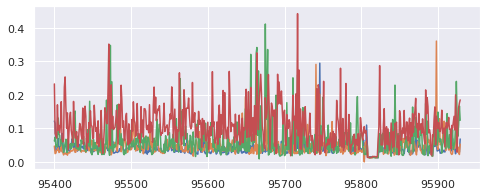

In [21]:
for i in range(10):
    plot_four_time(i*20)

In [28]:
t =  KMeans(n_clusters = i).fit(X)

In [53]:
X.shape

(447320, 4)

  0%|          | 0/2 [00:00<?, ?it/s]

ValueError: x and y must have same first dimension, but have shapes (5,) and (2,)

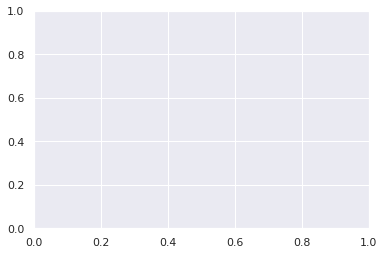

In [54]:
# silhouette index
#'breakfast', 'daytime', 'evening'
X = four_time[['overnight', 'breakfast', 'daytime', 'evening']].to_numpy().reshape(-1 ,4)
Y = four_time['FDI'].to_numpy()
silhouette_avg = []
for i in tq.tqdm(range(1,3)):
    kmeans_fit = KMeans(n_clusters = i).fit(X)
    silhouette_avg.append(silhouette_score(X, Y))
plt.plot(range(1,6), silhouette_avg)

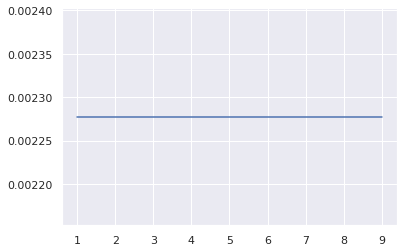

In [40]:
plt.plot(range(1,10), silhouette_avg)